In [1]:
import tweepy
import pandas as pd
import ast
import warnings;
warnings.filterwarnings('ignore');

In [2]:
#Read dataframes by date
from pathlib import Path  
date_range = pd.date_range(start='2021-07-19', end='2021-08-11')

df_dict = {}
for i in date_range:
    date = i.strftime('%Y-%m-%d')
    filepath = Path('dataframes_by_date/'+date+".csv")
    df_dict[date] = pd.read_csv(filepath, encoding = "utf-8")

In [3]:
df_dict['2021-07-21']

,Unnamed: 0,id,time,text,city_name,coordinates,place
0,5753,1417635474898923529,2021-07-21 00:00:10+00:00,@KathrynTappen @NBCSports @NBCOlympics Stay sa...,"Michigan, USA","[[[-90.4181075, 41.696088], [-82.122971, 41.69...",Place(_api=<tweepy.api.API object at 0x2b23538...
1,7078,1417635772790939650,2021-07-21 00:01:21+00:00,"The Olympics are back, y’all. Let’s play some ...","Orange City, FL","[[[-81.3155653, 28.897085], [-81.26003, 28.897...",Place(_api=<tweepy.api.API object at 0x2b23538...
2,5761,1417635990026530824,2021-07-21 00:02:13+00:00,man kobe know who that is !!!! https://t.co/56...,"Terrytown, LA","[[[-90.043765, 29.878501], [-90.008313, 29.878...",Place(_api=<tweepy.api.API object at 0x2b23538...
3,2281,1417636084733956101,2021-07-21 00:02:35+00:00,SO FREAKIN EXCITING!!!! https://t.co/IAkMrJcnrZ,"Auburn, AL","[[[-85.569969, 32.532449], [-85.413112, 32.532...",Place(_api=<tweepy.api.API object at 0x2b23538...
4,4224,1417636088890408969,2021-07-21 00:02:36+00:00,First event of #TokyoOlympics 🙌🏻 https://t.co/...,"Chicago, IL","[[[-87.940033, 41.644102], [-87.523993, 41.644...",Place(_api=<tweepy.api.API object at 0x2b23538...
...,...,...,...,...,...,...,...
1666,29023,1417996975736250371,2021-07-21 23:56:38+00:00,If an athlete from china or Russia turned thei...,"Barling, AR","[[[-94.323756, 35.320062], [-94.296113, 35.320...",Place(_api=<tweepy.api.API object at 0x2b23538...
1667,13522,1417996982765957120,2021-07-21 23:56:40+00:00,See now this suspension makes sense because no...,"Pittsburgh, PA","[[[-80.095586, 40.3615796], [-79.8657933, 40.3...",Place(_api=<tweepy.api.API object at 0x2b23538...
1668,57501,1417997212769001474,2021-07-21 23:57:35+00:00,USA v Canada 🥎 lets goooo!! #olympics #usa htt...,"Fairview Park, OH","[[[-81.875476, 41.417577], [-81.815851, 41.417...",Place(_api=<tweepy.api.API object at 0x2b23538...
1669,59805,1417997419585937409,2021-07-21 23:58:24+00:00,Night two of the Olympics will get underway in...,"Catonsville, MD","[[[-76.794408, 39.22709], [-76.688592, 39.2270...",Place(_api=<tweepy.api.API object at 0x2b23538...


In [4]:
# Get all tweets(string) in a list for each date
tweets_dict = {}
for i in date_range:
    tweets_dict[i.strftime('%Y-%m-%d')] =  df_dict[i.strftime('%Y-%m-%d')]['text'].tolist()

In [5]:
#example
print("Total number of tweets: \n{} \n".format(len(tweets_dict['2021-08-08'])))
print("Sample tweets: \n{}".format(tweets_dict['2021-08-08'][:3]))

Total number of tweets: 
2638 

Sample tweets: 
['Hey @marczumoff on the opening of the Olympics….', "He looks kinda happy, doesn't he? #TokyoOlympics #marathon #kipchoge 🏃🏽I need those shoes! 👟 #running", 'Texas boys dominating the AAU Junior Olympics in the 17-18yr old boys 3000 https://t.co/TlP2Ox71eb']


### Tokenisation and Stop Words Removal

In [6]:
import nltk
import gensim
from nltk.tokenize import RegexpTokenizer
#splits string into substrings using a regular expression
#tokenises words that contain 1 or more (+) alphanumeric characters (\w) or '@'
retokenizer = RegexpTokenizer(r'[\w@]+')
# create stop words list
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
# add twitter specific stop words
stop_words += ["rt", "got", "thats", "would", "going", "u", 
               "get", "also", "one", "could", "said", "like",
               "via", "say", "amp", "many", "need", "day", "want", 
               "last", "people", "done", "two",
               "outbreak", "know", "upon", "may", "way",
               "saw", "gtgt", "olympics", "tokyo2020", "tokyo", "olympics2021", "usa"
               "olympics2020", "@olympics", "tokyoolympics", "olympic"]
# create lemmatizer
wnl = nltk.stem.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home1/07144/yw23374/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home1/07144/yw23374/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
def process_text(documents, stop_words):
    processed_docs = []
    doc_tokens = []
    for doc in documents:
        doc = str(doc).lower()
        doc_tokens = retokenizer.tokenize(doc)
        doc_tokens = [token for token in doc_tokens if token not in stop_words]
        doc_tokens = [token for token in doc_tokens if len(token)>2]
        doc_tokens = [wnl.lemmatize(token) for token in doc_tokens]    
        processed_docs.append(doc_tokens)
    return processed_docs

In [8]:
# Gets a list of list of tokens (each nested list is from one tweet)
processed_tweets_dict = {}
for i in date_range:
    processed_tweets_dict[i.strftime('%Y-%m-%d')] =  process_text(tweets_dict[i.strftime('%Y-%m-%d')], stop_words)
    
#example    
processed_tweets_dict['2021-07-24'] = process_text(tweets_dict['2021-07-24'], stop_words)
print(len(processed_tweets_dict['2021-07-24']))

4120


### Create a dictionary representaion

<code>gensim</code> dictionary assigns an integer id to each unique word in the corpus

In [10]:
dictionary_dict = {}
for i in date_range:
    dictionary_dict[i.strftime('%Y-%m-%d')] =  gensim.corpora.Dictionary(processed_tweets_dict[i.strftime('%Y-%m-%d')])

#example    
print('Sample word to id mappings:\n', list(dictionary_dict['2021-07-21'].items())[:75])
print('Total Vocabulary Size:', len(dictionary_dict['2021-07-21']))

Sample word to id mappings:
 [(0, '@kathryntappen'), (1, '@nbcolympics'), (2, '@nbcsports'), (3, 'bad'), (4, 'fqfc3xlko5'), (5, 'hope'), (6, 'http'), (7, 'love'), (8, 'man'), (9, 'safe'), (10, 'stay'), (11, 'watching'), (12, 'wrong'), (13, 'back'), (14, 'let'), (15, 'play'), (16, 'softball'), (17, '56bli2z8iz'), (18, 'kobe'), (19, 'exciting'), (20, 'freakin'), (21, 'iakmrjcnrz'), (22, 'event'), (23, 'first'), (24, 'mrahgqeppe'), (25, '@boxingrich'), (26, 'aaid'), (27, 'consider'), (28, 'decline'), (29, 'even'), (30, 'golf'), (31, 'long'), (32, 'olympi'), (33, 'real'), (34, 'shouldnt'), (35, 'uhvuu6cpmf'), (36, 'underway'), (37, '6mc5zjldls'), (38, 'arnaud'), (39, 'bugle'), (40, 'dominating'), (41, 'fanfare'), (42, 'john'), (43, 'leo'), (44, 'shout'), (45, 'williams'), (46, '2008'), (47, '9ohxjtm1a0'), (48, 'beat'), (49, 'gold'), (50, 'japan'), (51, 'medal'), (52, 'played'), (53, 'sport'), (54, 'team'), (55, 'usa'), (56, 'australia'), (57, 'baseball'), (58, 'converted'), (59, 'field'), 

### Set parameters
Filter the vocabulary based on frequency, so as not to use less important words or words that do not help differentiate the topics.

In [11]:
# Filter out words that occur in less than 20 documents, or more than 50% of the documents.
for i in date_range:
    dictionary_dict[i.strftime('%Y-%m-%d')].filter_extremes(no_below=20, no_above=0.5)
#example
print('Total Vocabulary Size:', len(dictionary_dict['2021-08-01']))

Total Vocabulary Size: 147


### Create the vector space model (bag of words model in gensim)
The function doc2bow() counts the number of occurrences of each unique word, converts the word to its integer word id and returns the result as a sparse vector(words from the dictionary not present in the document are not stored in the document vector)

In [12]:
# Transforming corpus into bag of words vectors
corpus_vect_dict = {}
for i in date_range:
    corpus_vect_dict[i.strftime('%Y-%m-%d')] = [dictionary_dict[i.strftime('%Y-%m-%d')].doc2bow(text) for text in processed_tweets_dict[i.strftime('%Y-%m-%d')]]

In [13]:
#Check how the vector looks for the second tweet document
print(corpus_vect_dict['2021-07-21'][1])
print("\n", )
print(processed_tweets_dict['2021-07-21'][1])

[(2, 1), (3, 1), (4, 1), (5, 1)]


['back', 'let', 'play', 'softball']


In [14]:
print(len(corpus_vect_dict['2021-07-21']))

1671


In [15]:
#Viewing them as terms and their document frequencies, index into the dictionary

print([(dictionary_dict['2021-07-21'][id] , freq) for id, freq in corpus_vect_dict['2021-07-21'][1][:20]])

[('back', 1), ('let', 1), ('play', 1), ('softball', 1)]


In [16]:
#build model folders for later saving lda models
# import os
# for i in date_range:
#     os.mkdir('models/'+i.strftime('%Y-%m-%d')+"/Topics")

## Build the LDA model

In [17]:
#from gensim.test.utils import datapath
num_topics = 3
import pickle
ldamodel_dict = {}

#Build LDA model and save them

# for i in date_range:
#     date = i.strftime('%Y-%m-%d')
#     print("now processing "+str(i))
#     if(num_topics = 0):
#         continue
#     ldamodel_dict[date] = gensim.models.ldamodel.LdaModel(corpus_vect_dict[date], num_topics = num_topics, id2word=dictionary_dict[date], passes=25)
#     ldamodel_path = 'models/' + date +'/LDAmodels'
#     ldamodel_dict[date].save(ldamodel_path)

In [19]:
# load LDA model
import gensim.models as models
from os.path import exists


for i in date_range:
    date = i.strftime('%Y-%m-%d')
    ldamodel_path = 'models/' + i.strftime(date) +'/LDAmodels'
    if exists(ldamodel_path)==False:
        continue
    ldamodel_dict[date] = models.ldamodel.LdaModel.load(ldamodel_path)

In [20]:
#example
for num ,topic in ldamodel_dict['2021-07-31'].show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(num)+": "+ topic)

0: 0.091*"watching" + 0.082*"watch" + 0.055*"see" + 0.044*"let" + 0.040*"look" + 0.036*"even" + 0.034*"much" + 0.033*"thing" + 0.032*"final" + 0.030*"track"
1: 0.081*"gold" + 0.080*"usa" + 0.060*"love" + 0.056*"sport" + 0.037*"athlete" + 0.036*"awesome" + 0.034*"best" + 0.032*"teamusa" + 0.027*"swimming" + 0.026*"world"
2: 0.064*"team" + 0.060*"woman" + 0.058*"time" + 0.040*"great" + 0.040*"medal" + 0.038*"really" + 0.038*"event" + 0.038*"game" + 0.037*"men" + 0.034*"mixed"


In [21]:
topics = ldamodel_dict['2021-07-21'].show_topics(formatted=True, num_topics=num_topics, num_words=10)

In [22]:
topics[1] 

(1,
 '0.140*"uswnt" + 0.112*"game" + 0.078*"softball" + 0.075*"watch" + 0.064*"sweden" + 0.062*"play" + 0.058*"first" + 0.036*"summer" + 0.034*"wait" + 0.033*"take"')

### Compute Coherence Score

In [23]:
from gensim.models import CoherenceModel

# Compute Coherence Score for LDA Model
coherence_model_lda_dict = {}
coherence_lda_dict = {}
for i in date_range:
    date = i.strftime('%Y-%m-%d')
    ldamodel_path = 'models/' + i.strftime(date) +'/LDAmodels'
    if exists(ldamodel_path)==False:
        continue
    coherence_model_lda_dict[date] = CoherenceModel(model=ldamodel_dict[date], texts=processed_tweets_dict[date], dictionary=dictionary_dict[date], coherence='c_v')
    coherence_lda_dict[date] = coherence_model_lda_dict[date].get_coherence()
print('\nCoherence Score: ', coherence_lda_dict['2021-07-31'])


Coherence Score:  0.47968193292323424


### Finding Optimal Number of Topics

In [24]:
def compute_coherence_values(date, dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
#         model_list.append(model)
        model = gensim.models.ldamodel.LdaModel(corpus_vect_dict[date], num_topics = num_topics, id2word=dictionary_dict[date], passes=25)
        ldamodel_fname = 'models/' + i.strftime('%Y-%m-%d') +'/Topics/LDAmodels'+str(num_topics)
        model.save(ldamodel_fname)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherencemodel_fname = 'models/' + i.strftime('%Y-%m-%d') +'/Topics/COHERENCEmodels'+str(num_topics)
        coherencemodel.save(coherencemodel_fname)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [25]:
# # Can take a long time to run.
# Will run if have time

# model_list_dict = {}
# coherence_values_dict = {}
# for i in date_range:
#     date = i.strftime('%Y-%m-%d')
#     print("Now handling "+date)
#     ldamodel_path = 'models/' + i.strftime(date) +'/LDAmodels'
#     if exists(ldamodel_path)==False:
#         continue
#     model_list, coherence_values = compute_coherence_values(date=date,
#                                                             dictionary=dictionary_dict[date], 
#                                                             corpus=corpus_vect_dict[date],
#                                                             texts=processed_tweets_dict[date],
#                                                             start=2,
#                                                             limit=10)
#     model_list_dict[date] = model_list
#     coherence_values_dict[date] = coherence_values

In [27]:
def load_coherence_values(date, dictionary, corpus, texts, limit, start=2, step=1):
    """
    Load c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        date = i.strftime('%Y-%m-%d')
        ldamodel_fname = 'models/' + date +'/Topics/LDAmodels'+str(num_topics)
        model = models.ldamodel.LdaModel.load(ldamodel_fname)
        model_list.append(model)
        coherencemodel_fname = 'models/' + date +'/Topics/COHERENCEmodels'+str(num_topics)
        coherencemodel = models.ldamodel.LdaModel.load(coherencemodel_fname)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
model_list_dict = {}
coherence_values_dict = {}
for i in date_range:
    date = i.strftime('%Y-%m-%d')
    print("Now loading "+date)
    ldamodel_path = 'models/' + i.strftime(date) +'/LDAmodels'
    if exists(ldamodel_path)==False:
        continue
    model_list, coherence_values = load_coherence_values(date=date,
                                                            dictionary=dictionary_dict[date], 
                                                            corpus=corpus_vect_dict[date],
                                                            texts=processed_tweets_dict[date],
                                                            start=2,
                                                            limit=10)
    model_list_dict[date] = model_list
    coherence_values_dict[date] = coherence_values

Now loading 2021-07-19


Now loading 2021-07-20


Now loading 2021-07-21


Now loading 2021-07-22


Now loading 2021-07-23


Now loading 2021-07-24


Now loading 2021-07-25


Now loading 2021-07-26


Now loading 2021-07-27


Now loading 2021-07-28


Now loading 2021-07-29


Now loading 2021-07-30


Now loading 2021-07-31


Now loading 2021-08-01


Now loading 2021-08-02


Now loading 2021-08-03


Now loading 2021-08-04


Now loading 2021-08-05


Now loading 2021-08-06


Now loading 2021-08-07


Now loading 2021-08-08


Now loading 2021-08-09


Now loading 2021-08-10


Now loading 2021-08-11


In [29]:
coherence_values_dict["2021-07-21"]

[0.4290642874804169,
 0.4494247192258696,
 0.42201354696571364,
 0.40282619973407285,
 0.3781367605557146,
 0.3618345111448515,
 0.36093638156941077,
 0.38284051537271396]

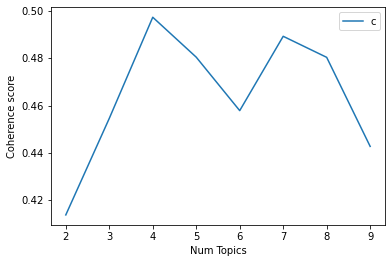

In [30]:
# # # Show graph for example
import matplotlib.pyplot as plt
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_dict["2021-07-31"])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
#save best topic number for each date
def decide_best_topic_num(date):
    best_coh = 0
    for i in range(0, 8):
        if best_coh < coherence_values_dict[date][i]:
            best_num = i+2
            best_coh = coherence_values_dict[date][i]
    return best_num, best_coh

In [32]:
#pick best ldamodel with certain topic number
best_ldamodel_dict = {}
for i in date_range:
    date = i.strftime('%Y-%m-%d')
    ldamodel_path = 'models/' + i.strftime(date) +'/LDAmodels'
    if exists(ldamodel_path)==False:
        continue
    best_topic_num, best_coh = decide_best_topic_num(date)
    best_ldamodel_path = 'models/' + date +'/Topics/LDAmodels'+str(best_topic_num)
    best_ldamodel_dict[date] = models.ldamodel.LdaModel.load(best_ldamodel_path)
#example
print(decide_best_topic_num("2021-07-31"))
print(best_ldamodel_dict["2021-07-31"])

(4, 0.4973773497848931)
LdaModel(num_terms=105, num_topics=4, decay=0.5, chunksize=2000)


### Visualize Topics

In [33]:
#!pip install pyLDAvis
import gensim
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
date = "2021-08-05"
LDAvis_prepared = pyLDAvis.gensim_models.prepare(best_ldamodel_dict[date], corpus_vect_dict[date], dictionary_dict[date])
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.138731  0.009809       1        1  18.366333
4     -0.241689  0.037115       2        1  15.612405
0     -0.260424 -0.082635       3        1  14.952616
3      0.194212 -0.159917       4        1  13.287236
2      0.228457  0.183343       5        1  12.861070
5      0.152839 -0.260792       6        1  12.669082
1      0.065337  0.273077       7        1  12.251258, topic_info=     Term        Freq       Total Category  logprob  loglift
23   game  118.000000  118.000000  Default  30.0000  30.0000
37    usa  191.000000  191.000000  Default  29.0000  29.0000
39    see   84.000000   84.000000  Default  28.0000  28.0000
15  sport   83.000000   83.000000  Default  27.0000  27.0000
45  medal  122.000000  122.000000  Default  26.0000  26.0000
..    ...         ...         ...      ...      ...      ...
44   take    0.134366   42.556111   Topic7  -8.2628  -3.6585
25   good    0.131196   56.832301   Topic7  -8.2867  -3.9716
24   feel    0.128499   35.513828   Topic7  -8.3074  -3.5222
9    much    0.128460   27.062263   Topic7  -8.3077  -3.2507
64    run    0.128415   32.364739   Topic7  -8.3081  -3.4300

[300 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
67        1  0.957746           4x100
34        1  0.950198    @nbcolympics
92        2  0.317813  @usabasketball
92        4  0.635625  @usabasketball
41        5  0.952015          always
...     ...       ...             ...
17        3  0.417110       wrestling
17        5  0.568786       wrestling
74        4  0.978874            year
74        6  0.013052            year
43        6  0.978666             yes

[145 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 1, 4, 3, 6, 2])

### General Word Cloud

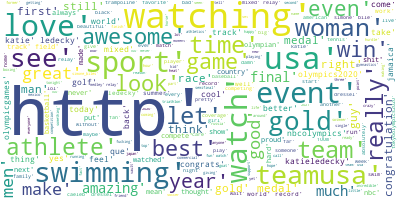

In [34]:
# Import the wordcloud library
#!pip install WordCloud
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = (',').join(map(str, processed_tweets_dict["2021-07-31"]))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()